## $\epsilon$ - Greedy 

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
class EplisonGreedy:
    def __init__(self,epsilon,n_arms,best_arm = 0):
        self.epsilon = epsilon
        self.n_arms = n_arms
        self.Q = np.array([1.0/n_arms] * n_arms) #action value
        self.R = np.array([0.0] * n_arms) #reward
        self.N = np.array([0] * n_arms) #selected occurence
        self.best_arm = best_arm # a default best arm
    
    def get_reward(self,action):
        
        # when the best arm is pulled, there are 90% of chance having a positive reward
        # otherwise only 10% of chance
        if action == self.best_arm:
            return np.random.choice([0.1,1],1,p = [0.1,0.9])[0]
        else:
            return np.random.choice([0.1,1],1,p = [0.9,0.1])[0]
        
    def get_action(self):
        
        ## generate a random float between 0-1, if < eplision then randomly choose (explore)
        ## otherwise choose the best arm
        rand = np.random.rand()
        if rand <= self.epsilon:
            action = np.random.randint(0,self.n_arms)
        else:
            action = np.argmax(self.Q)
        return action
        
    def step(self):
        action = self.get_action()
        reward = self.get_reward(action)
        #update reward
        self.R[action]+=reward
        
        #update N
        self.N[action]+=1

        #update Q
        self.Q[action] = self.R[action]/self.N[action]
        
        return reward
        
    def simulation(self,num_steps):
        total_reward = 0
        avg_reward = []
        for i in range(1,num_steps+1):
            reward = self.step()
            total_reward += reward
            avg_reward.append(total_reward/i)
            
        return avg_reward

[0.28       0.28       0.15       0.89989201 0.15625   ]


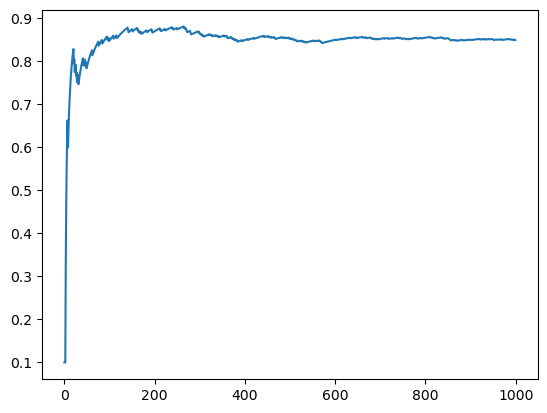

In [4]:
test = EplisonGreedy(epsilon = 0.1, n_arms = 5,best_arm = 3)
avg_reward = test.simulation(1000)
print(test.Q)
plt.plot(avg_reward)

[0.17714286 0.16       0.2173913  0.89813187 0.15294118]


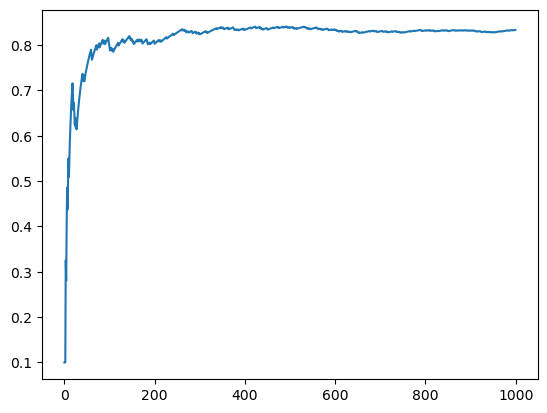

In [7]:
test = EplisonGreedy(epsilon = 0.1, n_arms = 5,best_arm = 3)
avg_reward = test.simulation(1000)
print(test.Q)
plt.plot(avg_reward)

[0.163      0.1742268  0.19       0.91763727 0.17826087]


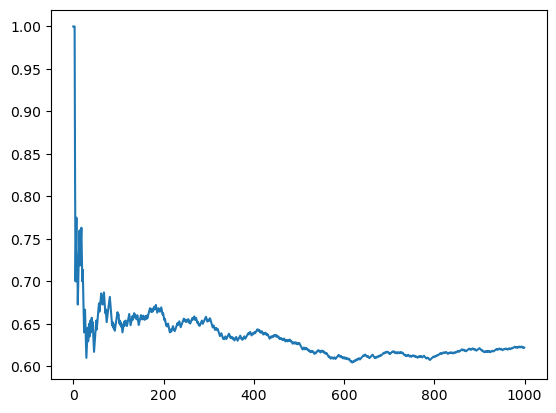

In [82]:
test = EplisonGreedy(epsilon = 0.5, n_arms = 5,best_arm = 3)
avg_reward = test.simulation(1000)
print(test.Q)
plt.plot(avg_reward)

In [78]:
test.Q

array([0.22315789, 0.15684211, 0.24823529, 0.91059603, 0.1892562 ])